# 0. Introduction
This notebook will examine the hypothetical return of various popular Real Estate ETF. From the last notebook, it can be seen that the Vanguard Real Estate Index Fund Admiral consistently outperformed the S&P 500; Thus, in this notebook, I will be using the same strategies and compared various Real Estate Related ETF.
<br>
<br>
The ETF I considered are the following. These ETF are obtained from "The Balance" website's articled named "The 8 Best REIT ETFs of 2019". #https://www.thebalance.com/best-reit-etfs-4174043.
<br>
<br>
1. Best Overall: Vanguard Real Estate ETF (VNQ)
<br>
2. Runner-up, Best Overall: Schwab U.S. REIT ETF (SCHH)
<br>
3. Best International: iShares Global REIT (REET)
<br>
4. Best Domestic: Fidelity MSCI Real Estate Index ETF (FREL)
<br>
5. Best Mortgage Focused: iShares Mortgage Real Estate ETF (REM)
<br>
6. Best High Yield: Invesco KBW Premium Yield Equity REIT ETF (KBWY)
<br>
7.Best Active Real Estate ETF: Invesco Active U.S. Real Estate Fund (PSR)
<br>
8. One of my favorite:
The adjusted return data for these three mutual funds are extracted using Yahoo Finance. The cumulative return vs. purchase date were calculated. The earliest purchase date available is November 2017.
<br>
Note: The calculation of return has not take care of the expense ratio of the ETFs

In [1]:
# import libraries
import numpy as np  
import pandas as pd
import yfinance as yf
from datetime import date, timedelta
import quandl as ql

# 1. Prepare Helper function

In [2]:
def load_symbol(symbol_list, period = "5y"):
    """ Given a stock symbol and period of interest, load data from yahoo finance and return a panda dataframe """

    # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max

    # example input: symbol = ["SPY", "APPL"] period = "5y"
    # will download data for SPY and Apple for the past 5 year from today

    try: 
        DF = yf.download(symbol_list, period = period)
        return (DF)
    except:
        print ("Failure parsing Yahoo Finance Data")
    
def select_adjclose_column (DF):
    """given a yahoo finance dataframe, select the adjusted close column"""

    return (DF["Adj Close"])


def fill_missing_values (DF):
    """ given a yahoo finance dataframe
    in case there are missing values, foward fill first followed by back fill """
    DF = DF.fillna(method = "ffill")
    DF = DF.fillna(method = "bfill")
    return (DF)


def compute_total_return_by_day (DF):
    """
    given a yahoo finance dataframe, compute the investment return from the start date until today

    Parameter:
    DF: A yahoo finance dataframe
    

    Return:
    A panda dataframe containing the cumulative return. Each row means return if buying at that particular date
    """
    return ((DF.iloc[-1]/DF-1.0)[:-1])


def plot_return (DF, note_dict = None, legend_position = "top_right"):

    from bokeh.plotting import figure, output_file, show
    from bokeh.io import output_notebook
    from bokeh.models import LinearAxis, Range1d
    from bokeh.palettes import Category10_10 as palette
    import itertools

    #initialize yesterday's date, because today's data is not yet available during a trading day
    yesterday = str(date.today() - timedelta(1))

    # create a color cycle for automatic color assignment
    colors = itertools.cycle(palette) 

    p = figure(x_axis_label = "Purchase Date",x_axis_type='datetime', y_axis_label = "Cumulative Return (%)", plot_width=600, plot_height=400, title="Cumulative Return Comparison until today (" + yesterday + ")")

    for ticker in DF.columns:
        if (note_dict == None):
            for ticker in DF.columns:

                p.line(DF.index, DF[ticker]*100, line_width=2, legend = ticker, color = next(colors))
        else: # add additional notation
            p.line(DF.index, DF[ticker]*100, line_width=2, legend = str(ticker + " (" + note_dict[ticker] + ")"), color = next(colors))


    p.legend.location= legend_position
    
    return (p)




def export_and_display_png(p, filename = "XX.PNG"):
    
    """ Export a bokeh graph to PNG and display the PNG. 
    
    Since bokeh can not reader on Github without a Python Engine, thus, display PNG instead
    
    Input:
    p: A bokeh graph
    filename: The filename for the PNG image

    Return: Nothing. It save a PNG to the directory and display it
    """

    from bokeh.plotting import figure, output_file, show
    from bokeh.io import export_png
    from IPython.display import Image

    # export to png
    try:
        export_png(p, filename="Fig 2.1.PNG")
    except:
        pass
    #work around because Bokeh will not load when uploaded as a Jupyter Notebook on Github

    
    try:
        display(Image(filename = "Fig 2.1.PNG"))
    except:
        pass



## 2. Load and Clean Data

In [3]:
symbol_list = ["VNQ", "SCHH", "REET", "FREL", "REM", "KBWY", "PSR", "USRT"]
# note_list = ["Value", "Growth", "S&P 500"] # add additional notation for clearity
# dictionary = dict(zip(symbol_list, note_list))

#print today's date
today = str(date.today())
print ("Today's date is ", today)


# load the three mutual fund.
DF = load_symbol(symbol_list, period = "max")

# select adjusted close and fill missing values
DF = fill_missing_values(select_adjclose_column(DF))


Today's date is  2019-08-27
[*********************100%***********************]  8 of 8 downloaded


# 3. Compute return and plotting
The daily cumulative return is compared and plotted

In [4]:
# compute cumulative return
DF1 = compute_total_return_by_day(DF)

### add a line for 10 year treasury ETF

# load data from Quandl
treasury = ql.get("USTREASURY/YIELD", authtoken = 'XXXX')

# Subset the 10 yr rate
treasury_10yr = fill_missing_values(treasury["10 YR"])

#subset from the earliest date to today
treasury_10yr = treasury_10yr.loc[DF.index]


D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  del sys.path[0]


Loading BokehJS ...

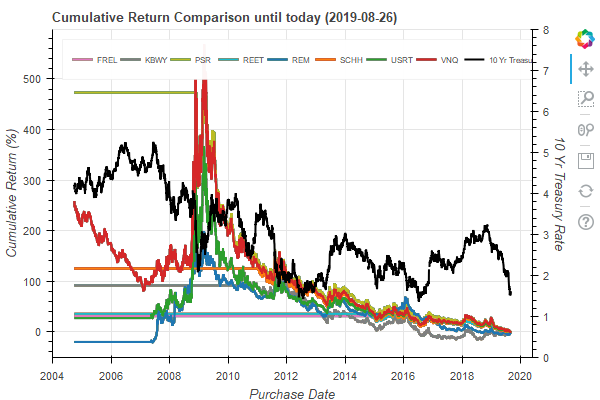

In [5]:
# plotting
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.models import LinearAxis, Range1d
from bokeh.io import export_png
from bokeh.palettes import Category10_10 as palette
import itertools

# display plot inline in notebook
output_notebook()
%matplotlib inline

p = plot_return (DF1, legend_position = "top_left")

#SET UP 2ND Y AXIS
p.extra_y_ranges = {"interest":Range1d(start = 0, end = 8)}

p.add_layout(LinearAxis(y_range_name = "interest", axis_label='10 Yr Treasury Rate'), "right")

p.line(DF1.index, treasury_10yr,  line_width=2, line_color = "black", y_range_name = "interest", legend = "10 Yr Treasury Rate")

p.legend.orientation = "horizontal"
p.legend.label_text_font_size = "6pt"
show (p)

export_and_display_png(p, filename = "Fig 3.1.PNG")




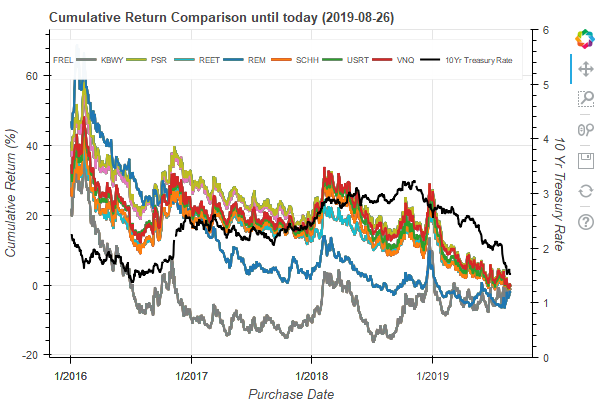

In [6]:

#%%
# Zoom in from 2016
p1 = plot_return (DF1.loc["2016-01-01":today])

# p1.x_range=Range1d("2016-01-01", str(today))


#SET UP 2ND Y AXIS
p1.extra_y_ranges = {"interest":Range1d(start = 0, end = 6)}

p1.add_layout(LinearAxis(y_range_name = "interest", axis_label='10 Yr Treasury Rate'), "right")

p1.line(DF1.loc["2016-01-01":today].index, treasury_10yr["2016-01-01":today],  line_width=2, line_color = "black", y_range_name = "interest", legend = "10 Yr Treasury Rate")

p1.legend.orientation = "horizontal"
p1.legend.label_text_font_size = "6pt"
show (p1)

export_and_display_png(p1, filename = "Fig 3.2.PNG")


# 4. Summary
Judging the return since 2016, VNQ, PSR, FREL are the top performer. In fact, their return are similar. While REM and KBWYare the worst performers.
<br>
 The treasury rate does not correlate well with return, but more analysis is needed.
<br>
As of today, the expense ratio of VNQ, PSR, FREL are 0.12%, 0.35% and 0.084% respectively.